# Support Vector Machines (SVM)

Oggi implementiamo un algoritmo per la classificazione usando una support vector machine (SVM).

Per i dettagli su cosa è una SVM potete vedere i riferimenti alla fine di questo articolo.

L'algoritmo di SVM che useremo è già implementato nel package [scikit-learn](https://scikit-learn.org/stable/) (sklearn per gli amici).
Nel gergo di sklearn viene sottolineato che si tratta di una classificazione, per cui viene chiamato support vector classifier (SVC).

Importiamo la libreria per una SVC lineare, quindi che usa un kernel lineare (o nessun kernel, a seconda della terminologia preferita):

## Generazione del dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Per questo esercizio definisco un dataset costituito da due cluster di punti perfettamente separabili. 

In [2]:
# fgr2 = plt.figure()

#Costruisco il dataset 
x1 = np.arange(0,10,0.1)
x2 = -2*x1 + 19
np.random.seed(seed=326780)
x1n = 0.8*np.random.randn(x1.shape[0])
x2n = 0.4*np.random.randn(x1.shape[0])
x1 = x1 + 1*x1n
x2 = x2 + 1*x2n

w1 = np.arange(0,10,0.1)
w2 = -2*w1 + 7
w1n = 1*np.random.randn(x1.shape[0])
w2n = 0.4*np.random.randn(x1.shape[0])
w1 = w1 + 1*w1n
w2 = w2 + 1*w2n

Nella figura sotto è rappresentato il dataset che ho generato. Come si vede i punti sono perfettamente separabili, per cui qualsiasi classificatore lineare che passi tra le due classi di punti è atto a definire una distinzione perfetta tra le due classi.

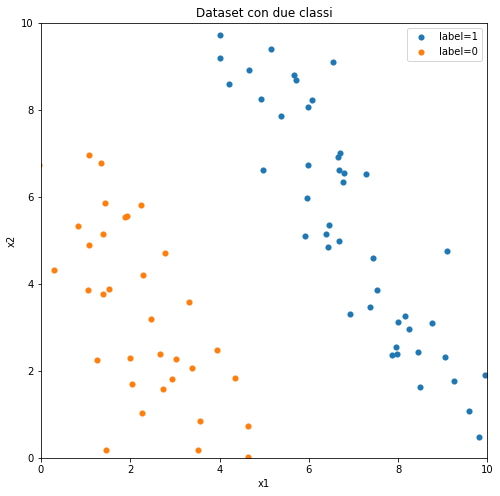

In [3]:
plt.figure(figsize=(8,8))

plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)

plt.xlim((0,10))
plt.ylim((0,10))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Dataset con due classi')

plt.show()

Ciascuna delle linee verdi tratteggiate è un perfetto classificatore per il dataset in questione. Il funzionamento del classificatore è ovvio, i punti sopra la linea sono classificati come 1, i punti sotto la linea sono classificati come 0.

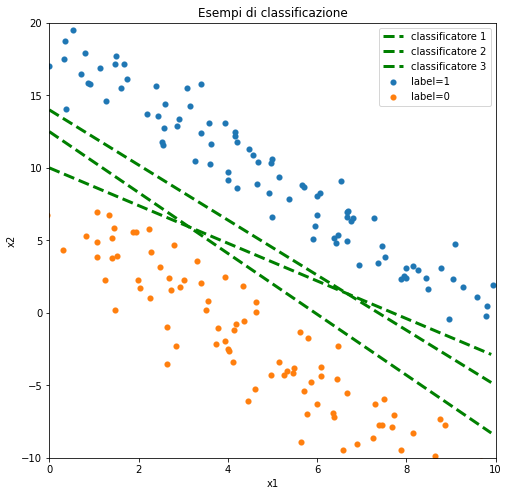

In [4]:
plt.figure(figsize=(8,8))

plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)

x = np.arange(0,10,0.1)
plt.plot(x, -2.1*x+12.5, '--', c='g', lw=3, label="classificatore 1")
plt.plot(x, -1.3*x+10, '--', c='g', lw=3, label="classificatore 2")
plt.plot(x, -1.9*x+14, '--', c='g', lw=3, label="classificatore 3")

plt.xlim((0,10))
plt.ylim((-10,20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Esempi di classificazione')
plt.show()

C'è un criterio per dire che uno dei classificatori è meglio degli altri? Una linea che passi al centro della fascia gialla è quello che ci serve.la fascia sul rosso è la più larga e con larghezza costante che passa tra i due set di punti. 
Un classificatore con queste proprietà è la support vector machine con kernel lineare.
Come si intuisce ci sono tre punti che definiscono questo margine, questi punti sono i **support vector**.
La linea che passa in mezzo è il classificatore SVM.

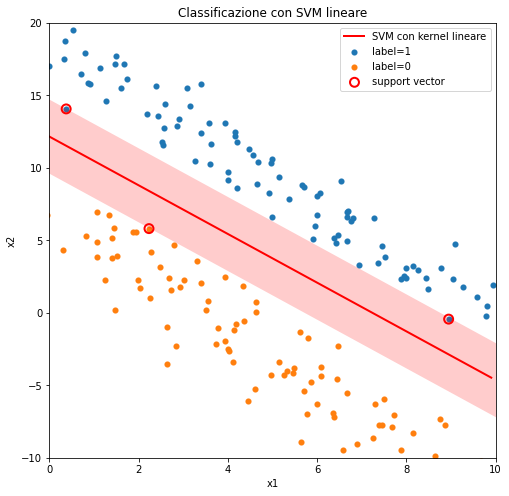

In [5]:
plt.figure(figsize=(8,8))

plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)

x = np.arange(0,10,0.1)
plt.plot(x, -1.68*x+12.16, '-', c='r', lw=65, alpha=0.2)
plt.plot(x, -1.68*x+12.16, '-', c='r', lw=2, label="SVM con kernel lineare")
plt.scatter([2.23269726, 8.94510844, 0.37743945],[ 5.81085615, -0.43360074, 14.06717346], s=80, \
            facecolors='none', edgecolors='r', label='support vector', lw=2)
plt.xlim((0,10))
plt.ylim((-10,20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Classificazione con SVM lineare')
plt.show()

Sopra ho costruito un dataset di punti costituito da due cluster distinti tra di loro. Finalizziamo i due set di dati in un unico dataset che useremo come input per l'algoritmo SVM.

In [6]:
x3 = np.ones(x1.shape[0]) #the label for the first cluster
w3 = np.zeros(w1.shape[0]) #the label for the second cluster

Creiamo le coordinate di ogni punto come (x1,x2,x3) e (w1,w2,w3)

In [7]:
cluster1 = np.array([x1,x2,x3]).transpose()
cluster2 = np.array([w1,w2,w3]).transpose()

Uniamo i due cluster in un unico np.array 

In [8]:
dataset = np.concatenate((cluster1,cluster2),axis=0)

E infine facciamo uno shuffle dei dati:

In [9]:
np.random.shuffle(dataset)

## Divido il dataset

In [10]:
from sklearn.model_selection import train_test_split

Dopo avere importato la funzione **modell_selection.train_test_split** passo alla divisione del dataset in train datatset, sul quale andrò a fare il training del classificatore, e test dataset che userò per valutsre le performance del classificatore.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(dataset[:,0:2], dataset[:,2])

## SVM model

Adesso definiamo una SVM lineare per la classificazione dei punti.

Per prima cosa, importo il modello SVC con kernel generico. 

In [12]:
from sklearn.svm import SVC

Definisco i parametri della mia SVM, in particolare uso un kernel lineare (o no kernel, secondo le preferenze), con un $C$ abbastanza grande e il gamma su auto (cosa è il gamma per il kernel lineare?). 

In [13]:
classifier = SVC(kernel='linear', C=100000, gamma='auto')

Faccio il training del classificatore.

In [14]:
classifier.fit(x_train, y_train)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Una volta fatto il training posso procedere con le previs
ioni.

Iniziamo con il predire l'uscita quando all'ingresso ho il dataset di test.

In [15]:
y_test_pred = classifier.predict(x_test)

Vediamo come sono le performance del classificatore, importo alcune metriche

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

e calcolo l'accuratezza, la precisione, il recall, e il punteggio F1

In [17]:
print(accuracy_score(y_test, y_test_pred))
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred))

1.0
1.0
1.0
1.0


Com'era prevedibile, considerando che le due classi sono separabili, le previsioni sono perfette e tutti i punteggi sopra calcolati sono uguali a uno. 

Tra le proprietà dell'oggetto *classifier* ci sono **support_vector_** che mi da i punti che costituiscono i vettori di supporto, e **support_** che da gli indici dove si trovano i vettori di supporto.

In [18]:
classifier.support_vectors_

array([[ 2.23269726,  5.81085615],
       [ 8.94510844, -0.43360074],
       [ 0.37743945, 14.06717346]])

In [19]:
classifier.support_ #indice dei support_vector(s)

array([ 50,  65, 104])

Plottiamo il dataset e i vettori di supporto.

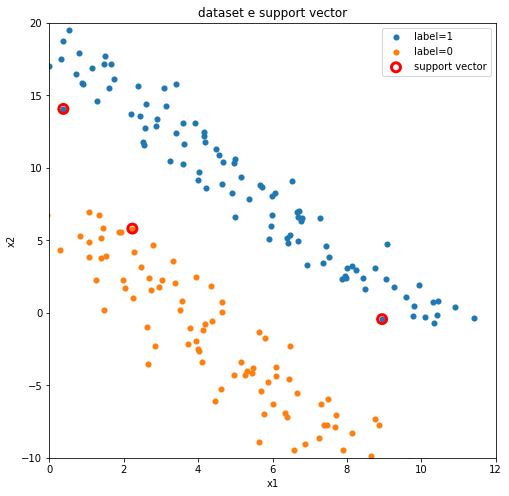

In [20]:
plt.figure(figsize=(8,8))

plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)

plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1], s=80, edgecolors="r", facecolors="none",lw=3, label="support vector")

plt.xlim((0,12))
plt.ylim((-10,20))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('dataset e support vector')
plt.legend()
plt.show()

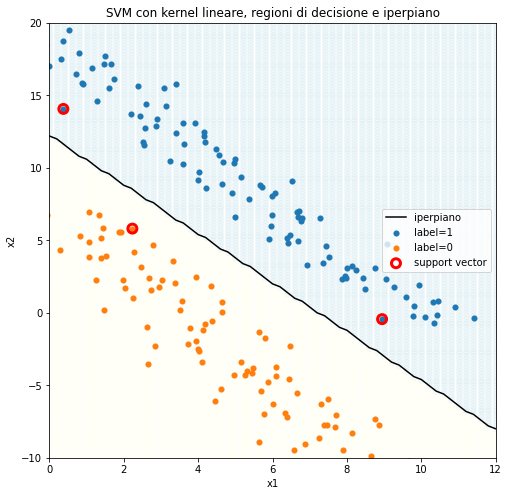

In [21]:
plt.figure(figsize=(8,8))

# creo una meshgrid nel piano X1,X2

delta = .2 #spaziatura tra i punti

#il range dei valori di x1 e x2
ax1_min = 0
ax1_max = 12
ax2_min = -10
ax2_max = 20

#definisco una meshgrid
ax1 = np.arange(ax1_min, ax1_max + delta, delta)
ax2 = np.arange(ax2_min, ax2_max + delta, delta)
AX1, AX2 = np.meshgrid(ax1, ax2)

#applico la decision_function ad ogni punto della meshgrid
#questa da valori positivi per una classe e negativi per l'altra
Z = classifier.decision_function(np.c_[AX1.ravel(), AX2.ravel()])
Z = Z.reshape(AX1.shape)

plt.scatter(AX1[Z>0], AX2[Z>0],  alpha=0.1, c="lightblue")
plt.scatter(AX1[Z<0], AX2[Z<0],  alpha=0.1, c="lightyellow")

plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)

plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1], s=80,edgecolors="r", \
            facecolors="none",lw=3, label="support vector")

iperpiano = np.array([[AX1[0,i],AX2[np.argmax(Z[:,i]>0) if not(all(Z[:,i]<0) ) else -1,0]] for i in range(AX1.shape[1])])
plt.plot(iperpiano[:,0], iperpiano[:,1], c='black', label="iperpiano")

plt.xlim((0,12))
plt.ylim((-10,20))
plt.xlabel('x1')
plt.title('SVM con kernel lineare, regioni di decisione e iperpiano')
plt.ylabel('x2')
plt.legend()
plt.show()

In [22]:
classifier.support_vectors_

array([[ 2.23269726,  5.81085615],
       [ 8.94510844, -0.43360074],
       [ 0.37743945, 14.06717346]])

In [23]:
classifier.support_vectors_[:,0], classifier.support_vectors_[:,1]

(array([2.23269726, 8.94510844, 0.37743945]),
 array([ 5.81085615, -0.43360074, 14.06717346]))

In [24]:
classifier.class_weight_

array([1., 1.])

In [25]:
(classifier.support_vectors_[0])*classifier.class_weight_

array([2.23269726, 5.81085615])

Calcolo la distanza tra ogni supporto e l'iperpiano. Ricordando che i suporti definiscono il margine tra le due classi e che l'iperpiano sta al centro di questo margine, mi aspetto che i supporti siano equidistanti dall'iperpiano.

La distanza è:

\begin{equation*}
dist(x,iperpiano) = \frac{f(x)}{\|w\|}
\end{equation*}

dove:

$f(x) = 0$ è la funzione che definisce l'iperpiano, con $f(x) = classifier.decision\_function$ 

$w$ è il vettore perperdicolare all'iperpiano, con $ w = (w_1,w_2) = classifier.coef\_ $

$\|w\|$ è la norma di $w$ ovvero $\|w\| = \sqrt{w_1^2 + w_2^2}$

Queste sono le distanze tra l'iperpiano e ognuno dei 3 support vector:

In [26]:
[classifier.decision_function(classifier.support_vectors_[i].reshape(-1,2))\
 /np.sqrt(classifier.coef_[0][0]**2 + classifier.coef_[0][1]**2) for i in range(classifier.support_.shape[0])]

[array([-1.30108992]), array([1.30150109]), array([1.30150031])]

Come atteso le distanze sono tutte uguali, a parte il segno che indica da quale lato del piano si trova in punto, rispetto all'iperpino.

## Sommario

La SVM lineare che ho definito e addestrato, definisce una partizione del piano (x1,x2). 

Le due partizioni sono rapresentate in blu e rosa pallido.

L'iperpiano trovato è quello che massimizza il margine di separazione tra le due classi. Il margine è la larghezza della banda gialla nella figura sotto.

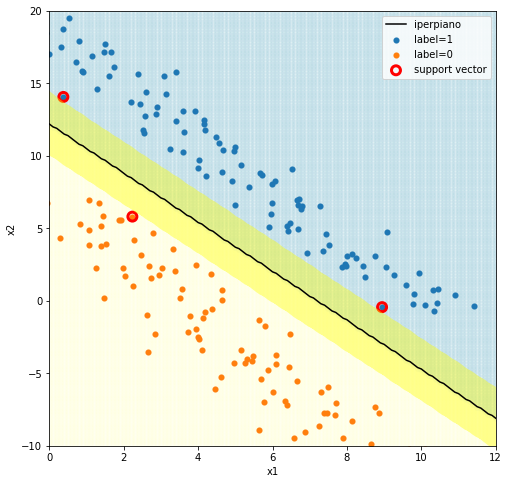

In [27]:
plt.figure(figsize=(8,8))

axx = plt.axes()

# creo una meshgrid nel piano X1,X2

delta = .1 #spaziatura tra i punti

#il range dei valori di x1 e x2
ax1_min = 0
ax1_max = 12

ax2_min = -10
ax2_max = 20

#definisco la meshgrid
ax1 = np.arange(ax1_min, ax1_max + delta, delta)
ax2 = np.arange(ax2_min, ax2_max + delta, delta)
AX1, AX2 = np.meshgrid(ax1, ax2)

#applico la decision_function ad ogni punto della meshgrid
#questa da valori positivi per una classe e negativi per l'altra
Z = classifier.decision_function(np.c_[AX1.ravel(), AX2.ravel()])
Z = Z.reshape(AX1.shape)

plt.scatter(AX1[Z>0], AX2[Z>0],  alpha=0.1, c="lightblue")
plt.scatter(AX1[Z<0], AX2[Z<0],  alpha=0.1, c="lightyellow")
plt.xlim((0,10))
plt.ylim((0,50))


iperpiano = np.array([[AX1[0,i],AX2[np.argmax(Z[:,i]>0),i] if not(all(Z[:,i]<0)) else 100] for i in range(AX1.shape[1])])
plt.plot(iperpiano[:,0], iperpiano[:,1], c='yellow', lw=52, alpha=0.4)
plt.plot(iperpiano[:,0], iperpiano[:,1], c='black', label="iperpiano")
plt.scatter(x1,x2, label="label=1", lw=0.1)
plt.scatter(w1,w2, label="label=0", lw=0.1)
plt.scatter(classifier.support_vectors_[:,0], classifier.support_vectors_[:,1], s=80,edgecolors="r", facecolors="none",lw=3, label="support vector")


plt.xlim((ax1_min,ax1_max))
plt.ylim((ax2_min,ax2_max))
plt.xlabel('x1')

plt.ylabel('x2')
plt.legend()

plt.show()